In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Carregar o DataFrame limpo
df = pd.read_csv("StudentPerformance_limpo.csv")

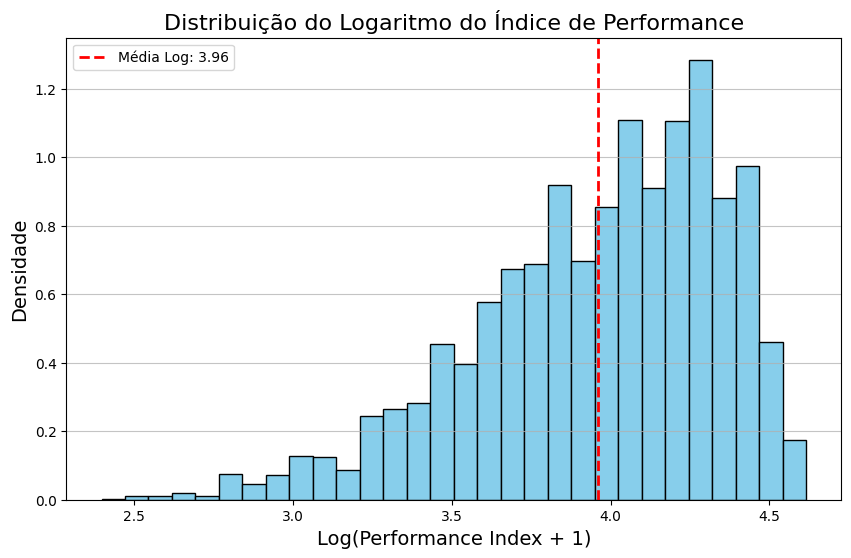

In [5]:
'''
1. **Distribuição da Performance Index**: Crie um histograma para visualizar a distribuição da coluna `Performance Index` 
após a transformação logarítmica.
'''
# Aplicação da Transformação Logarítmica
log_performance_index = np.log1p(df['Performance_Index'])

# Geração do Histograma
plt.figure(figsize=(10, 6))

plt.hist(
    log_performance_index, 
    bins=30, 
    color='skyblue', 
    edgecolor='black',
    density=True 
)

# Adicionar a linha de média para referência
mean_log = log_performance_index.mean()
plt.axvline(mean_log, color='red', linestyle='dashed', linewidth=2, label=f'Média Log: {mean_log:.2f}')

# Adicionar título e rótulos
plt.title('Distribuição do Logaritmo do Índice de Performance', fontsize=16)
plt.xlabel('Log(Performance Index + 1)', fontsize=14)
plt.ylabel('Densidade', fontsize=14)
plt.legend()
plt.grid(axis='y', alpha=0.75) 

# Mostrar o gráfico
plt.show()

C:\Users\rafae\AppData\Local\Temp\ipykernel_27140\3002765365.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


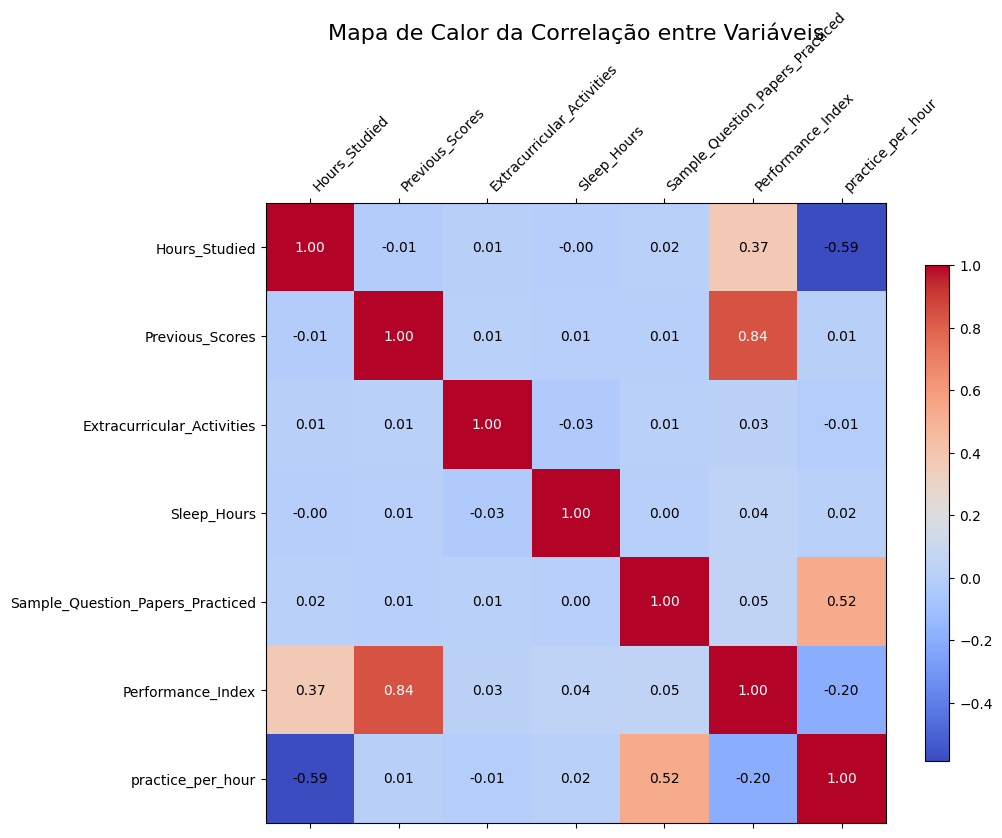

In [7]:
'''
2. **Correlação entre Variáveis**: Utilize um mapa de calor (heatmap) para visualizar a correlação entre as variáveis 
numéricas do DataFrame, destacando a relação com a coluna `Performance Index`.
'''

corr_matrix = df.corr()
columns = corr_matrix.columns.tolist()

# Cria as coordenadas (índices i, j) e os valores (v) de forma vetorizada
indices = np.indices(corr_matrix.shape)
values = corr_matrix.values.flatten()
rows = indices[0].flatten()
cols = indices[1].flatten()

plt.figure(figsize=(10, 8))
plt.matshow(corr_matrix, cmap='coolwarm', fignum=1) 


plt.colorbar(shrink=0.8)


plt.xticks(range(len(columns)), columns, rotation=45, ha='left', fontsize=10)
plt.yticks(range(len(columns)), columns, fontsize=10)

[
    plt.text(j, i, f"{v:.2f}", 
             ha="center", va="center", 
             color='black' if abs(v) < 0.6 else 'white', 
             fontsize=10)
    for i, j, v in zip(rows, cols, values)
]

plt.title('Mapa de Calor da Correlação entre Variáveis', y=1.25, fontsize=16) 
plt.tight_layout()

plt.show()

Gerando 7 boxplots individuais para visualização clara:


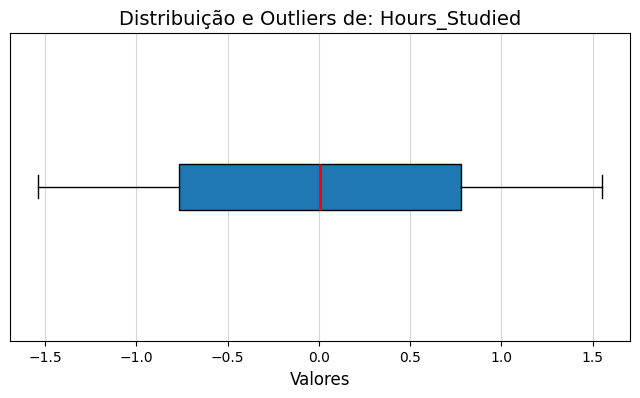

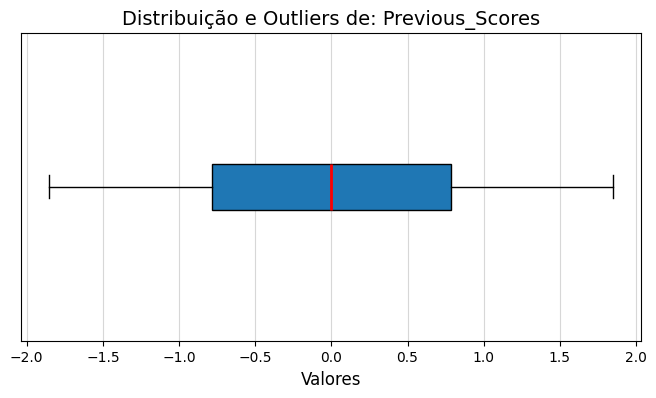

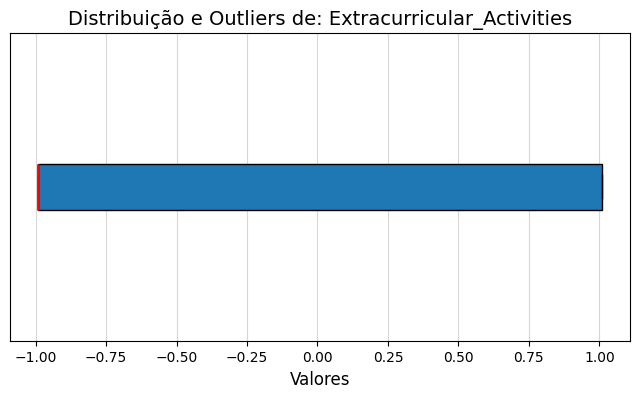

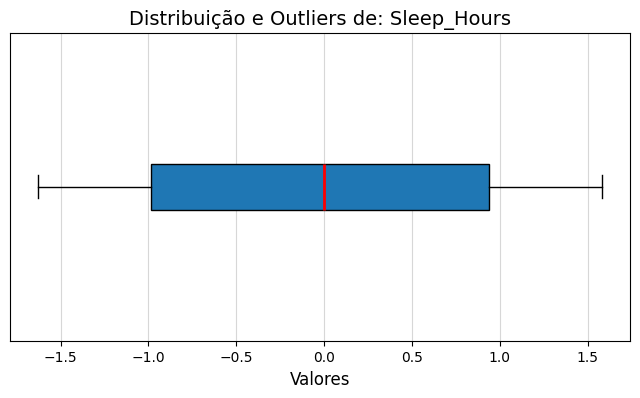

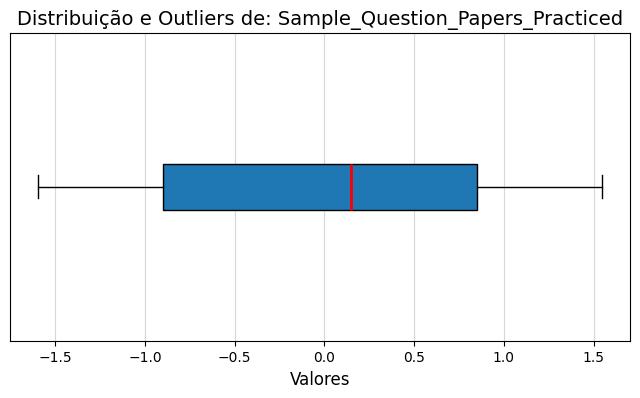

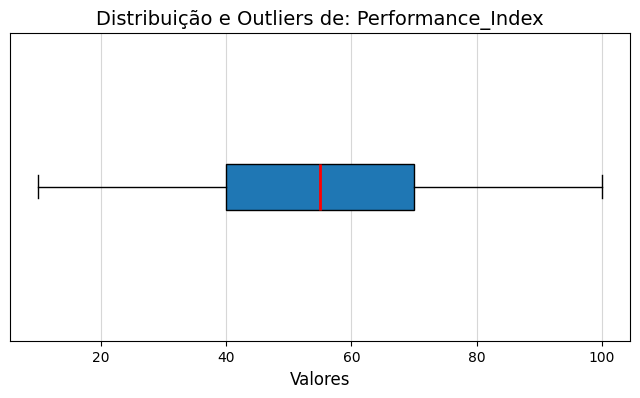

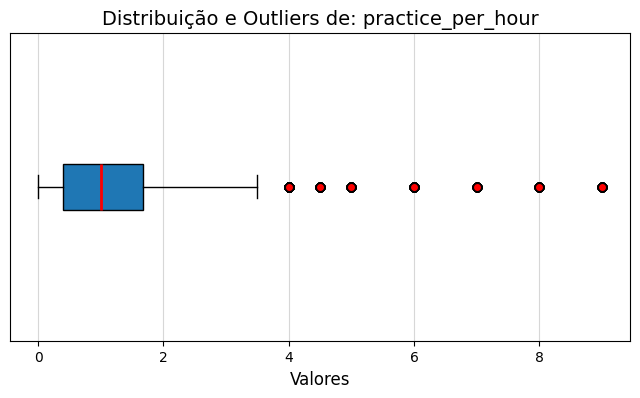

In [ ]:
'''
3. **Boxplot de Variáveis Numéricas**: Gere boxplots para 
visualizar a distribuição das variáveis numéricas, identificando possíveis outliers e a dispersão dos dados.
'''

numeric_cols = [
    'Hours_Studied', 
    'Previous_Scores', 
    'Extracurricular_Activities', 
    'Sleep_Hours',
    'Sample_Question_Papers_Practiced', 
    'Performance_Index', 
    'practice_per_hour'
]

# Função auxiliar para plotar cada Boxplot separadamente para não usar loop
def plot_single_boxplot(data_series, column_name):
    """
    Gera e exibe um boxplot individual.
    :param data_series: Dados de uma única coluna (array 1D).
    :param column_name: Nome da coluna para o título.
    """
    plt.figure(figsize=(8, 4))
    
    # Plota o boxplot horizontal, vetorizado
    plt.boxplot(data_series, 
                vert=False, 
                patch_artist=True, 
                medianprops={'color': 'red', 'linewidth': 2},
                flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 6, 'linestyle': 'none'}
    )
    
    # Configurações de visualização
    plt.title(f'Distribuição e Outliers de: {column_name}', fontsize=14)
    plt.xlabel('Valores', fontsize=12)
    plt.yticks([]) 
    plt.tick_params(axis='y', left=False) 
    plt.grid(axis='x', alpha=0.5)
    plt.show()

print("Gerando 7 boxplots individuais para visualização clara:")

plot_single_boxplot(df['Hours_Studied'].values, 'Hours_Studied')
plot_single_boxplot(df['Previous_Scores'].values, 'Previous_Scores')
plot_single_boxplot(df['Extracurricular_Activities'].values, 'Extracurricular_Activities')
plot_single_boxplot(df['Sleep_Hours'].values, 'Sleep_Hours')
plot_single_boxplot(df['Sample_Question_Papers_Practiced'].values, 'Sample_Question_Papers_Practiced')
plot_single_boxplot(df['Performance_Index'].values, 'Performance_Index')
plot_single_boxplot(df['practice_per_hour'].values, 'practice_per_hour')
    

